In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Linear regression from sklearn
from sklearn.linear_model import LinearRegression

### Linear Regression ###
https://realpython.com/linear-regression-in-python/

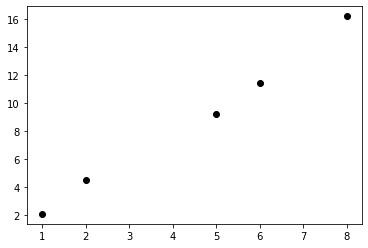

In [2]:
x = [1, 2, 5, 6, 8]
y = [2.1, 4.5, 9.25, 11.45, 16.2]

plt.plot(x, y, 'ko')
plt.show()

### Change the shape of the input and output data ###

In [3]:
# Re-shape the data
x1 = np.array(x)
y1 = np.array(y)

# x must be two-dimensional, one column and the data in the rows
x1 = np.reshape(x1, newshape=(-1, 1))

# Let's look at the shapes of x1 and y1
print(x1.shape)
print(y1.shape)

(5, 1)
(5,)


### Create the linear model and fit the data ###

In [4]:
# Create an instance of the model class
model = LinearRegression()

# Start using the model
model.fit(x1, y1)

LinearRegression()

In [5]:
# Get the results y = m * x + c
m = model.coef_[0]
c = model.intercept_

# Print the best fit equation
print(f'Best linear fit: y = {m:.2f} * x + {c:.2f}')

Best linear fit: y = 1.94 * x + 0.18


### Create a graph of the original data and fit line ###

In [6]:
# Create some new data for the plot of the fit line
x_model = np.arange(np.amin(x), np.amax(x)+0.5, 0.5)

# We need to reshape this into a 2D array as well
x_model = np.reshape(x_model, newshape=(-1, 1))
y_model = model.predict(x_model)

# We can also predict the y values for the original x values
y1_model = model.predict(x1)

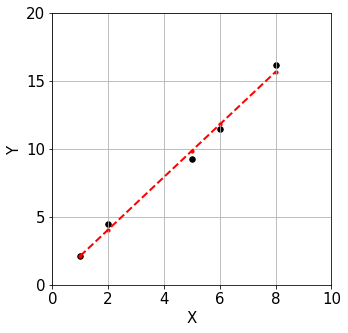

In [7]:
# Now, we can plot the original data
# Lets make a proper figure
fig, ax = plt.subplots(figsize = (5, 5))

# Plot the original data
ax.scatter(x, y, color = 'k', marker='o', s=30)

# Plot the fit line
ax.plot(x_model, y_model, color='r', linewidth=2, linestyle='--')

# Plot the predictions of the original data
ax.scatter(x, y1_model, color='r', marker='o', s=10)

# Set the axis limits and ticks
ax.set(xlim = [0, 10], xticks=np.arange(0, 11, 2),
       ylim = [0, 20], yticks=np.arange(0, 21, 5))

# Axes labels
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)

# Increase the font size for the tickmarks
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Let's add some grid lines
plt.grid()

plt.show()

### How good is the model? ###

In [8]:
# Lets calculate the difference betweeen
# The original data (y, black) and the predicted data (y1_model, red)

y_differences = y - y1_model
print(y_differences)

# Now, how can we put this into a single number?
# Lets square them
y_squared = [value**2 for value in y_differences]
print()
print(y_squared)
print()

# Then, we can calculate the mean (Mean Squared Error)
MSE = np.mean(y_squared)
print(f'Mean squared error: {MSE: .2f}')

# Or, we can calculate the square root of the mean difference
RMSD = np.sqrt(np.mean(y_squared))
print(f'Root-mean-square deviation: {RMSD: .2f}')

[-0.02018072  0.44457831 -0.61114458 -0.34638554  0.53313253]

[0.00040726157642621293, 0.19764987661489317, 0.37349769560168133, 0.11998294382348632, 0.28423029467266936]

Mean squared error:  0.20
Root-mean-square deviation:  0.44
